# Artificial Intelligence II – Assignment #1

## 1 Refreshing Mathematics [25 points]


### Solutions for a. b. c. in separate pdf submitted to owl.



### (d) if 
$$
A = \begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\quad \text{and} \quad
B = \begin{bmatrix}
2 & -1 \\
-1 & 3 \end{bmatrix}
$$ 
### Is f(w) a convex function? (Hint: you may use Python/Matlab/R for this question.)


### 

In [331]:
import numpy as np

# matrices A and B
A = np.array([[1, 1],
              [1, -1]])
B = np.array([[2, -1],
              [-1, 3]])

# Compute Hessian matrix H
AB = np.dot(A, B)
H = AB + AB.T

#Check if convex
def isConvex(hessian):
    eigenvalues = np.linalg.eigvals(hessian)
    return all(eigenvalues >= 0)


# output 
if isConvex(H):
    convexOutput = f'<div style="font-size: 20px;">Fuction f(w) is convex</div>'
    display(HTML(convexOutput))

else:
    convexOutput = f'<div style="font-size: 20px;">Fuction f(w) is not convex</div>'
    display(HTML(convexOutput))


## 2 Linear and Polynomial Regression [50 points]

### For this exercise, you will implement linear and polynomial regression in any programming language of your choice (e.g., Python/Matlab/R). The training data set consists of the features hw1xtr.dat and their desired outputs hw1ytr.dat. The test data set consists of the features hw1xte.dat and their desired outputs hw1yte.dat.


### Imports for libraries

In [332]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

### (a) [5 points] Load the training data hw1xtr.dat and hw1ytr.dat into the memory and plot it on one graph. Load the test data hw1xte.dat and hw1yte.dat into the memory and plot it on another graph.

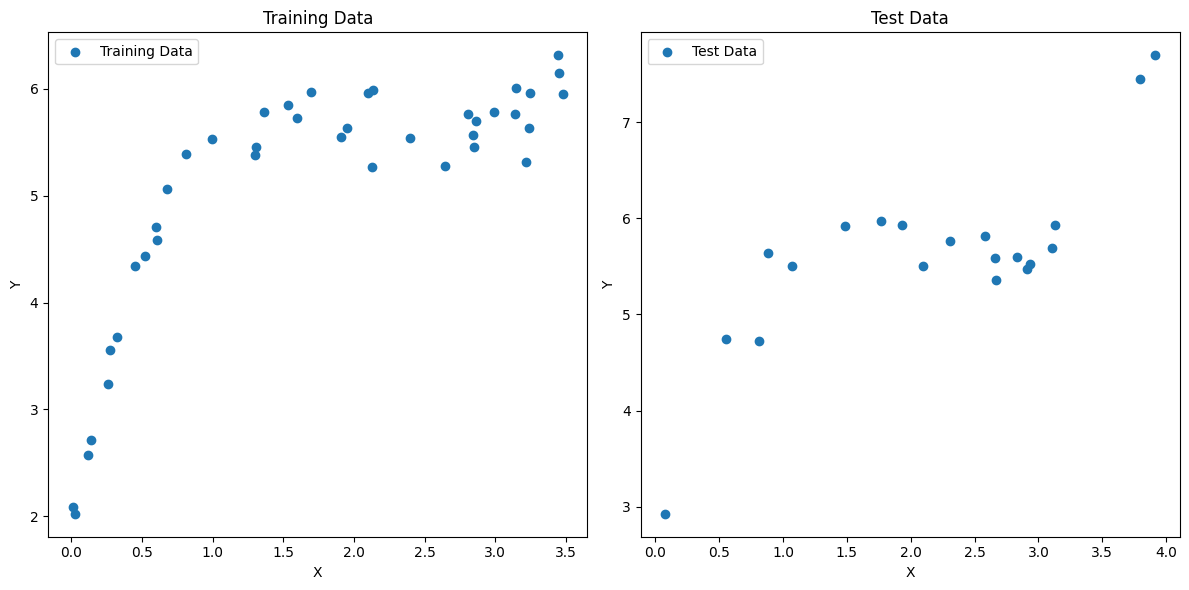

In [333]:
#load training data
xTrain = np.loadtxt('hw1xtr.dat')
yTrain = np.loadtxt('hw1ytr.dat')
xTrain = xTrain.reshape(-1, 1)  
yTrain = yTrain.reshape(-1, 1)

#load test data
xTest = np.loadtxt('hw1xte.dat')
yTest = np.loadtxt('hw1yte.dat')
xTest = xTest.reshape(-1, 1)
yTest = yTest.reshape(-1, 1)

# smooth range of values for X 
xTrainSmooth = np.linspace(min(xTrain), max(xTrain), 1000)
xTestSmooth = np.linspace(min(xTest), max(xTest), 1000)

# smooth range of values for Y 
yTrainSmooth = np.linspace(min(yTrain), max(yTrain), 1000)
yTestSmooth = np.linspace(min(yTrain), max(yTrain), 1000)


plt.figure(figsize=(12,6),label = '2.a.)')  

# Subplot for training data
plt.subplot(1, 2, 1)
plt.scatter(xTrain, yTrain, label='Training Data')
plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


# Plot test data
# Subplot for test data
plt.subplot(1, 2, 2)
plt.scatter(xTest, yTest, label='Test Data')
plt.title('Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

### (b) [10 points] Add a column vector of 1’s to the features, then use the linear regression formula discussed in Lecture 3 to obtain a 2-dimensional weight vector; Plot both the linear regression line and the training data on the same graph. (8 points) 

### Also report the average error on the training set using Eq. (1), rounded to four decimal places. (2 points) 

### $$ e r r=\frac{1}{m} \sum_{i=1}^m\left(w^{\top} x_i-y_i\right)^2 $$

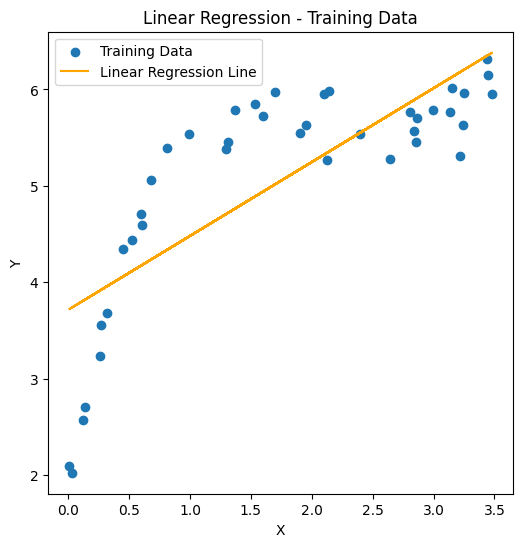

In [334]:
#add column vector of 1s to training and test featues
xTrain1 = np.column_stack((np.ones_like(xTrain), xTrain))
xTest1 = np.column_stack((np.ones_like(xTest), xTest))

# Calculate the weight vector using the linear regression formula
w1 = np.linalg.inv(xTrain1.T.dot(xTrain1)).dot(xTrain1.T).dot(yTrain)

# Plot both the linear regression line and the training data on the same graph
plt.figure(figsize=(6, 6))
plt.scatter(xTrain, yTrain, label='Training Data')
plt.title('Linear Regression - Training Data')
plt.plot(xTrain, xTrain1.dot(w1), color='orange', label='Linear Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Avg error for the training data
avgErrTrain1 = round(np.mean((xTrain1.dot(w1) - yTrain)**2), 4)

# Format the output message with HTML for larger text
outputAvgErrorTrain1 = f'<div style="font-size: 20px;">Average error on the training set: {avgErrTrain1}</div>'

# Display the HTML-formatted text
display(HTML(outputAvgErrorTrain1))

### (c) [5 points] Plot both the regression line and the test data on the same graph. (3 points) Also report the average error on the test set using Eq. (1), rounded to four decimal places. (2 points)

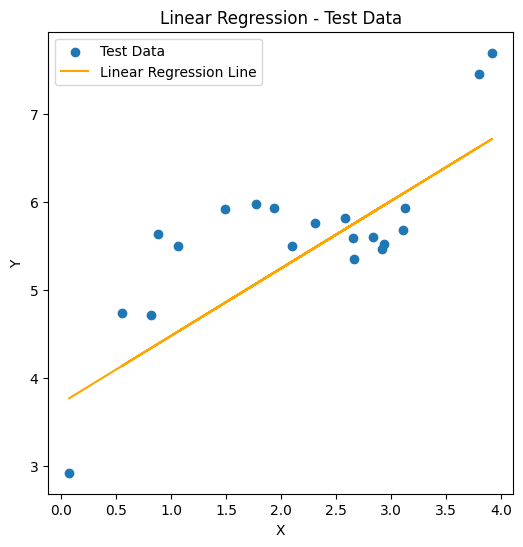

In [335]:
# Plot both the linear regression line and the test data on the same graph
plt.figure(figsize=(6, 6))
plt.scatter(xTest, yTest, label='Test Data')
plt.title('Linear Regression - Test Data')
plt.plot(xTest, xTest1.dot(w1), color='orange', label='Linear Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Avg error for the test set
AvgErrTest1 = round(np.mean((xTest1.dot(w1) - yTest)**2),4)

# Format the output message with HTML for larger text
outputAvgErrorTest1= f'<div style="font-size: 20px;">Average error on the test set: {AvgErrTest1}</div>'

# Display the HTML-formatted text
display(HTML(outputAvgErrorTest1))


### (d) [10 points] Implement the 2nd-order polynomial regression by adding new features x2 to the inputs, repeat (b) and (c). (8 points) Compare the training error and test error. Is it a better fit than linear regression? Briefly explain. (2 points)

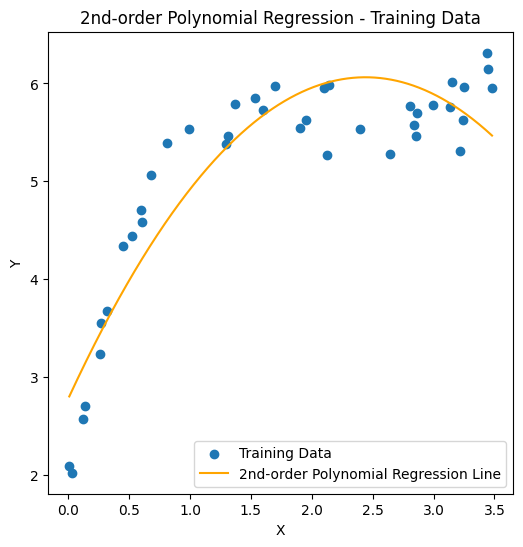

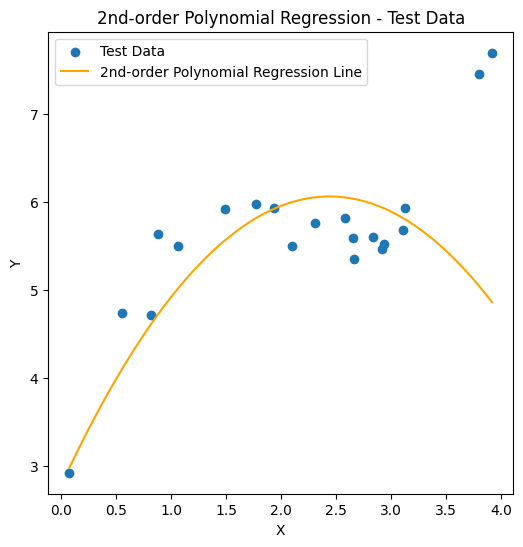

In [336]:
# Add column vector of x^2 and 1s to training and test features
xTrain2 = np.column_stack((np.ones_like(xTrain), xTrain, xTrain**2))
xTest2 = np.column_stack((np.ones_like(xTest), xTest, xTest**2))



#smooth value range for x 
xTrain2Smooth = np.column_stack((np.ones_like(xTrainSmooth), xTrainSmooth, xTrainSmooth**2))
xTest2Smooth = np.column_stack((np.ones_like(xTestSmooth), xTestSmooth, xTestSmooth**2))



# Calculate the weight vector using the linear regression formula
w2 = np.linalg.inv(xTrain2.T.dot(xTrain2)).dot(xTrain2.T).dot(yTrain)


# Plot the 2nd order polynomial regression line and the training data
plt.figure(figsize=(6,6))
plt.scatter(xTrain, yTrain, label='Training Data')
plt.title('2nd-order Polynomial Regression - Training Data')


plt.plot(xTrainSmooth, xTrain2Smooth.dot(w2), color='orange', label='2nd-order Polynomial Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Avg error for the training data
avgErrTrain2 = round(np.mean((xTrain2.dot(w2) - yTrain)**2), 4)

# Format the output message with HTML for larger text
outputAvgErrorTrain2 = f'<div style="font-size: 20px;">Average error on the training set: {avgErrTrain2}</div>'

# Display the HTML-formatted text
display(HTML(outputAvgErrorTrain2))

# Plot the 2nd order polynomial regression line and the test data
plt.figure(figsize=(6, 6))
plt.scatter(xTest, yTest, label='Test Data')
plt.title('2nd-order Polynomial Regression - Test Data')



plt.plot(xTestSmooth, xTest2Smooth.dot(w2), color='orange', label='2nd-order Polynomial Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Avg error for the test set
AvgErrTest2 = round(np.mean((xTest2.dot(w2) - yTest)**2),4)

# Format the output message with HTML for larger text
outputAvgErrorTest2= f'<div style="font-size: 20px;">Average error on the test set: {AvgErrTest2}</div>'

# Display the HTML-formatted text
display(HTML(outputAvgErrorTest2))



training errors: second order polynomial regression has a lower error (0.201) compared to linear regression (0.5086) this shows that the second order polynomial regression fits the training data better

test error: for the second-order polynomial regression (0.8533) is significantly higher than that of linear regression (0.4439), suggesting that the second order polynomial regression performs worse on unseen data

although the second order polynomial regression fits the training data better, it suffers from overfitting. Linear regression, while having a higher training error it generalizes better to unseen data making it the better it the better in this situation.

### (e) [10 points] Implement the 3rd-order polynomial regression by adding new features x2,x3 to the inputs, repeat (b) and (c). (8 points) Compare the training error and test error. Is it a better fit than linear regression and 2nd-order polynomial regression? Briefly explain. (2 points)

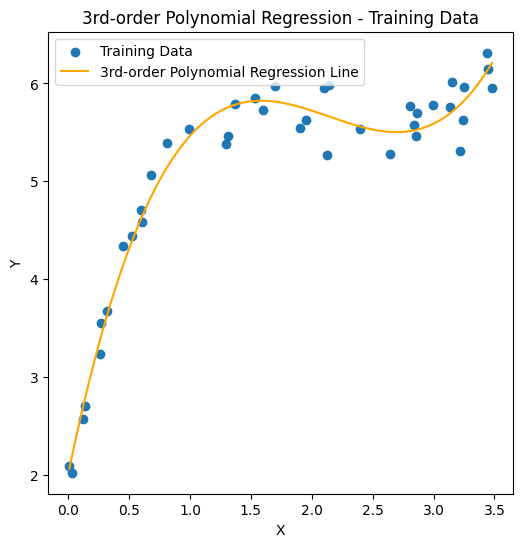

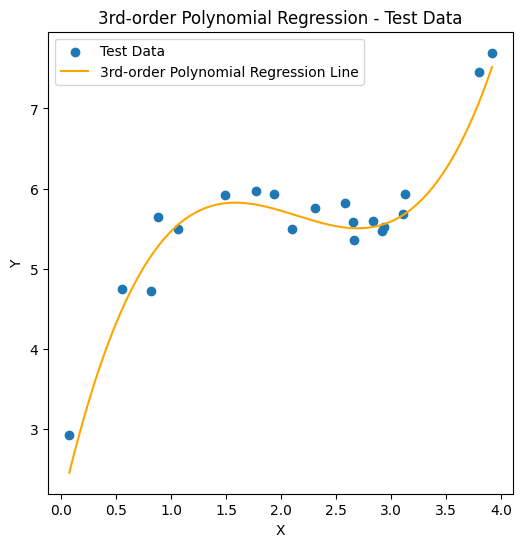

In [337]:

# Add column vector of x^2 and x^3 and 1s to training and test features



xTrain3 = np.column_stack((np.ones_like(xTrain), xTrain, xTrain**2, xTrain**3))
xTest3 = np.column_stack((np.ones_like(xTest), xTest, xTest**2, xTest**3))

#smooth value range for x 
xTrain3Smooth = np.column_stack((np.ones_like(xTrainSmooth), xTrainSmooth, xTrainSmooth**2, xTrainSmooth**3))
xTest3Smooth = np.column_stack((np.ones_like(xTestSmooth), xTestSmooth, xTestSmooth**2, xTestSmooth**3))


# Calculate the weight vector using the linear regression formula
w3 = np.linalg.inv(xTrain3.T.dot(xTrain3)).dot(xTrain3.T).dot(yTrain)

# Plot the 3rd order polynomial regression line and the training data
plt.figure(figsize=(6, 6))
plt.scatter(xTrain, yTrain, label='Training Data')
plt.title('3rd-order Polynomial Regression - Training Data')

plt.plot(xTrainSmooth, xTrain3Smooth.dot(w3), color='orange', label='3rd-order Polynomial Regression Line')
#plt.plot(xTrain, xTrain3.dot(w3), color='orange', label='3rd-order Polynomial Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Avg error for the training data
avgErrTrain3 = round(np.mean((xTrain3.dot(w3) - yTrain)**2), 4)

# Format the output message with HTML for larger text
outputAvgErrorTrain3 = f'<div style="font-size: 20px;">Average error on the training set: {avgErrTrain3}</div>'

# Display the HTML-formatted text
display(HTML(outputAvgErrorTrain3))

# Plot the 3rd order polynomial regression line and the test data
plt.figure(figsize=(6, 6))
plt.scatter(xTest, yTest, label='Test Data')
plt.title('3rd-order Polynomial Regression - Test Data')

plt.plot(xTestSmooth, xTest3Smooth.dot(w3), color='orange', label='3rd-order Polynomial Regression Line')
#plt.plot(xTest, xTest3.dot(w3), color='orange', label='3rd-order Polynomial Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Avg error for the test set
AvgErrTest3 = round(np.mean((xTest3.dot(w3) - yTest)**2),4)

# Format the output message with HTML for larger text
outputAvgErrorTest3= f'<div style="font-size: 20px;">Average error on the test set: {AvgErrTest3}</div>'

# Display the HTML-formatted text
display(HTML(outputAvgErrorTest3))


training errors: the third-order polynomial regression has a much lower error (0.0392) compared to both linear regression and second order polynomial regression indicating that it fits the training data better

test errors: the third-order polynomial regression also outperforms both linear regression and second order polynomial regression. Its test error (0.0564) is considerably lower than that of both linear and second-order polynomial regression

the third-order polynomial regression provides the best fit for this dataset it has the lowest errors on both the training and test sets.

### (f) [10 points] Implement the 4th-order polynomial regression by adding new features x2,x3,x4 to the inputs, repeat (b) and (c). (6 points) Compare the training error and test error. Compared with the previous results, which order is the best for fitting the data? Briefly explain. (4 points)


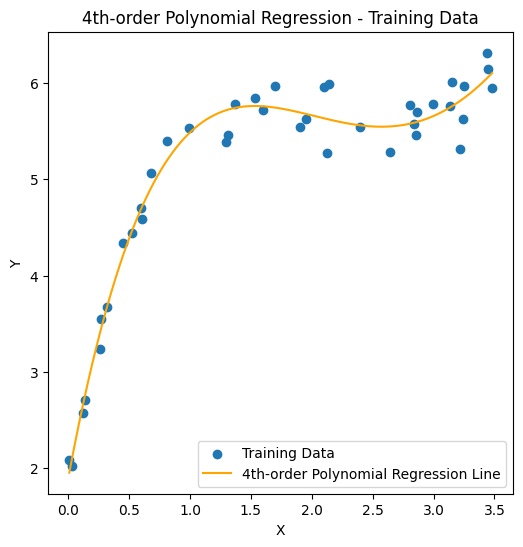

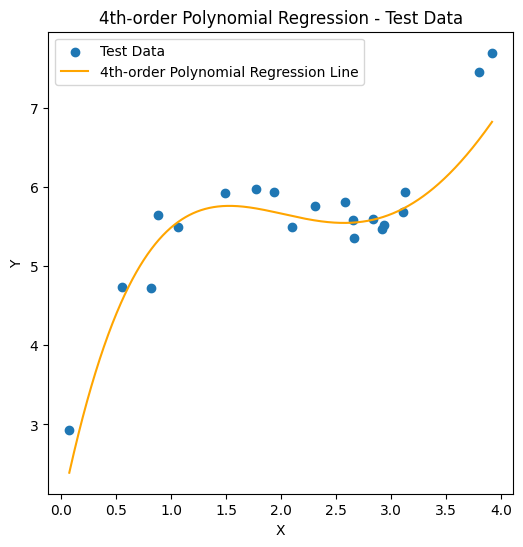

In [338]:
# Add column vector of x^2 and x^3 and x^3 and 1s to training and test features
xTrain4 = np.column_stack((np.ones_like(xTrain), xTrain, xTrain**2, xTrain**3, xTrain**4))
xTest4 = np.column_stack((np.ones_like(xTest), xTest, xTest**2, xTest**3,xTest**4))

#smooth value range for x 
xTrain4Smooth = np.column_stack((np.ones_like(xTrainSmooth), xTrainSmooth, xTrainSmooth**2, xTrainSmooth**3, xTrainSmooth**4))
xTest4Smooth = np.column_stack((np.ones_like(xTestSmooth), xTestSmooth, xTestSmooth**2, xTestSmooth**3, xTestSmooth**4))

# Calculate the weight vector using the linear regression formula
w4 = np.linalg.inv(xTrain4.T.dot(xTrain4)).dot(xTrain4.T).dot(yTrain)

# Plot the 4th order polynomial regression line and the training data
plt.figure(figsize=(6, 6))
plt.scatter(xTrain, yTrain, label='Training Data')
plt.title('4th-order Polynomial Regression - Training Data')


plt.plot(xTrainSmooth, xTrain4Smooth.dot(w4), color='orange', label='4th-order Polynomial Regression Line')
#plt.plot(xTrain, xTrain4.dot(w4), color='orange', label='4th-order Polynomial Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Avg error for the training data
avgErrTrain4 = round(np.mean((xTrain4.dot(w4) - yTrain)**2), 4)

# Format the output message with HTML for larger text
outputAvgErrorTrain4 = f'<div style="font-size: 20px;">Average error on the training set: {avgErrTrain4}</div>'

# Display the HTML-formatted text
display(HTML(outputAvgErrorTrain4))

# Plot the 4th order polynomial regression line and the test data
plt.figure(figsize=(6, 6))
plt.scatter(xTest, yTest, label='Test Data')
plt.title('4th-order Polynomial Regression - Test Data')

plt.plot(xTestSmooth, xTest4Smooth.dot(w4), color='orange', label='4th-order Polynomial Regression Line')

#plt.plot(xTest, xTest4.dot(w4), color='orange', label='4th-order Polynomial Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Avg error for the test set
AvgErrTest4 = round(np.mean((xTest4.dot(w4) - yTest)**2),4)

# Format the output message with HTML for larger text
outputAvgErrorTest4= f'<div style="font-size: 20px;">Average error on the test set: {AvgErrTest4}</div>'

# Display the HTML-formatted text
display(HTML(outputAvgErrorTest4))

training errors: the fourth order polynomial regression has a lower error (0.0356) compared to linear regression, second order polynomial regression, and third order polynomial regression this shows that it fits the training data better.

test errors: the fourth order polynomial regression performs worse than the third order polynomial regression. Its test error (0.1272) is higher than the one of the third order polynomial regression model

the fourth-order polynomial regression model fits the training data very well but it has overfitting as shown by its higher test error compared to the third-order polynomial regression. for this reason the third order polynomial regression model might be a better choice as it also provides a low error but in addition to that also a good balance between fitting the training data and generalizing to unseen data.

## 3 Regularization and Cross-Validation [25 points]


### (a) [10 points] Using the training data to implement l2-regularized for the 4th-order polynomial regression (page 12 of Lecture 4, note that we do not penalize the bias term w0), vary the regularization parameter λ ∈ {0.01; 0.1; 1; 10; 100; 1000}. Plot the training and test error (averaged over all instances) using Eq. (1) as a function of λ (you should use a log10 scale for λ). (6 points) Which λ is the best for fitting the training data? Which λ is the best for fitting the test data? Report the corresponding errors (rounded to four decimal places) and briefly explain. (4 points)

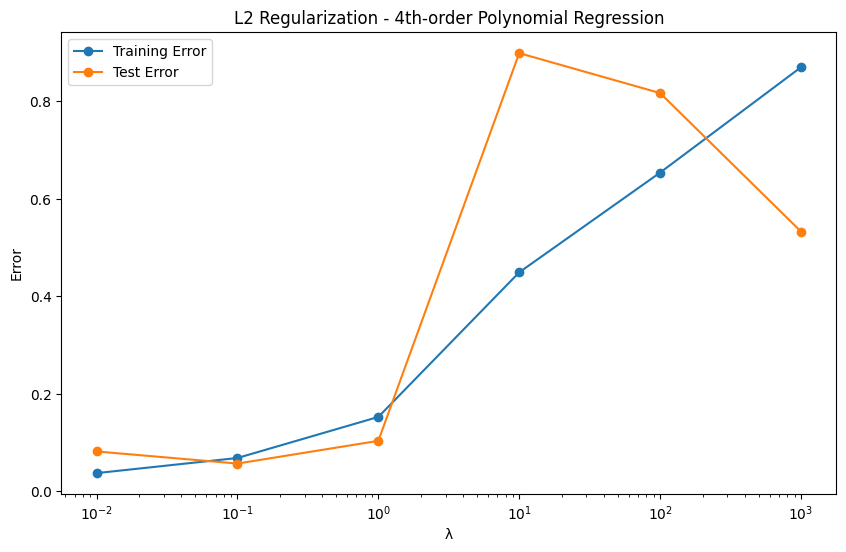

In [339]:
#function to calculate the regularized weights using l2 regularization
def calcRegularizedWeights(x,y,lambdaValue):
    # lambda * identity
    regMatrix = lambdaValue*np.identity(x.shape[1])
  
    #exclude w0 from regularization
    regMatrix[0][0] = 0
    #formula for regularization
    wRegularized = np.linalg.inv(x.T.dot(x) + regMatrix).dot(x.T).dot(y)

    return wRegularized

#function to calculate error using equation (1)
def calcError(x,y,w):
    #average error
    avgErr = np.mean((x.dot(w) - y)**2)

    return avgErr


#List to hold lambda values
lambdaValueList = [0.01, 0.1, 1, 10, 100, 1000]

#List to hold errors
trainingErrorList = []
testErrorList = []

#list to hold weights 
weightList = []

#Loop through each lambda value and calculate the errors 
for lambdaValue in lambdaValueList:
    #find w4 regularied   
    w4Regularized = calcRegularizedWeights(xTrain4,yTrain,lambdaValue)

    #calculate training error
    AvgErrTrainL2 = calcError(xTrain4,yTrain,w4Regularized)
    #append to training error list
    trainingErrorList.append(AvgErrTrainL2)
    #print average training error
    outputAvgErrorTrainingL2= f'<div style="font-size: 20px;">λ = {lambdaValue}, Average error on the training set: {round(AvgErrTrainL2,4)}</div>'
    display(HTML(outputAvgErrorTrainingL2))

    #calculate test error
    AvgErrTestL2 = calcError(xTest4,yTest,w4Regularized)
    #append to test error list
    testErrorList.append(AvgErrTestL2)
    #print average test error
    outputAvgErrorTestL2= f'<div style="font-size: 20px;">λ = {lambdaValue}, Average error on the test set with: {round(AvgErrTestL2,4)}</div>'
    display(HTML(outputAvgErrorTestL2))

    # Append weights
    weightList.append(w4Regularized)


# Plotting the training and test errors
plt.figure(figsize=(10, 6))
plt.plot(lambdaValueList, trainingErrorList, marker='o', label='Training Error')
plt.plot(lambdaValueList, testErrorList, marker='o', label='Test Error')
plt.xscale('log')  # Use log scale for better visualization
plt.xlabel('λ')
plt.ylabel('Error')
plt.title('L2 Regularization - 4th-order Polynomial Regression')
plt.legend()
plt.show()  

Best λ for fitting the training data: λ = 0.01, with an average error of 0.0374.

Best λ for fitting the test data: λ = 0.1, with an average error of 0.057.

The difference in performance between the best λ for training and test data shows a trade off between fitting the training data well and generalizing well to unseen data. here a slightly higher λ (0.1) is preferred for better generalization to the test data, even though it leads to slightly higher error on the training set.

### (b) [10 points] Plot the value of each weight parameter (including the bias term w0) as a function of λ. (10 points)

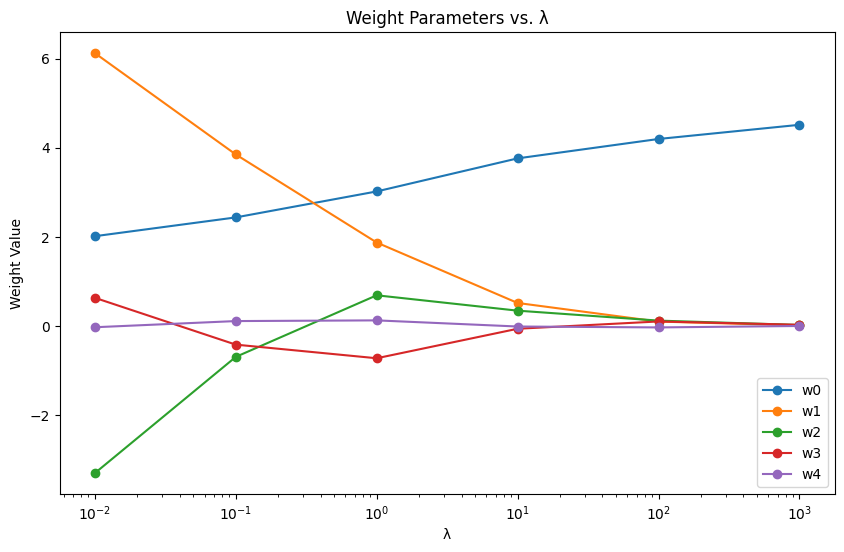

In [340]:
# plotting the value of each weight parameter as a function of λ
weightArray = np.array(weightList)  

plt.figure(figsize=(10, 6))
for i in range(weightArray.shape[1]):
    plt.plot(lambdaValueList, weightArray[:, i], marker='o', label=f'w{i}')
plt.xscale('log')  
plt.xlabel('λ')
plt.ylabel('Weight Value')
plt.title('Weight Parameters vs. λ')
plt.legend()
plt.show()

### (c) [5 points] Write a procedure that performs five-fold cross-validation on your training data (page 7 of Lecture 4). Use it to determine the best value for λ. Plot the average error on the validation set as a function of λ and report the best value for λ. Is the same as the best λ in (a)? (3 points) 

### For the best fit, plot the test data and the ℓ2-regularized 4th-order polynomial regression line obtained. (2 points)

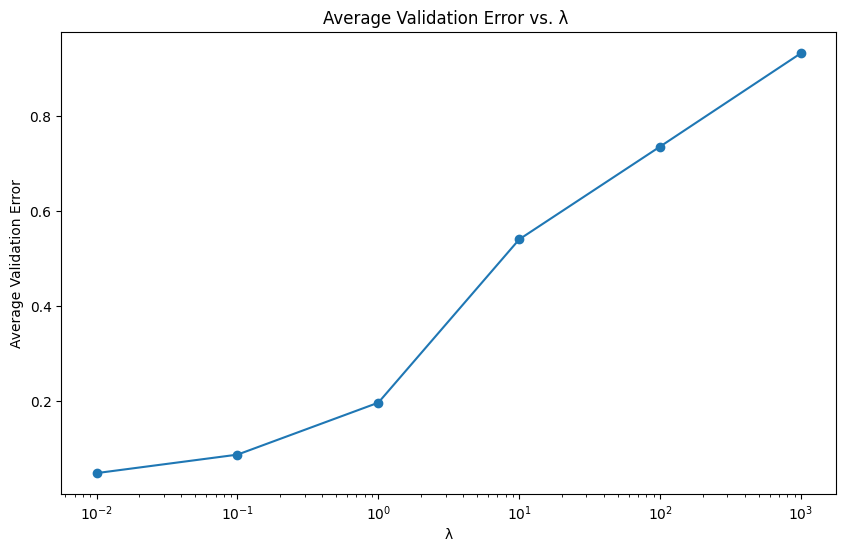

In [341]:


# Function to perform five-fold cross-validation
def crossValidation(xTrain, yTrain, lambdaValueList):
    # list to store average errors for each lambda value
    avgError = []  

    #find size of each fold
    foldSize = len(xTrain) // 5

    #iterate over each lambda value
    for lambdaValue in lambdaValueList:  
        # lst to store errors for each fold
        foldError = []  
        #iterate over each fold
        for k in range(5):  
            # start index of validation data for the current fold
            startIndex = k *foldSize  
            # end index of validation data for the current fold
            endIndex = (k + 1) * foldSize 

            # split the data into training and validation sets for the current fold
            xValidationFold= xTrain[startIndex:endIndex]
            yValidationFold = yTrain[startIndex:endIndex]
            xTrainFold = np.concatenate([xTrain[:startIndex], xTrain[endIndex:]], axis=0)
            yTrainFold = np.concatenate([yTrain[:startIndex], yTrain[endIndex:]], axis=0)

            # calculate the regularized weights using training data based on current fold
            wCrossRegularized= calcRegularizedWeights(xTrainFold, yTrainFold, lambdaValue)

            # calculate the error on the validation set based on current fold
            error = calcError(xValidationFold, yValidationFold, wCrossRegularized)

            # add the error to the error list for the currrent lambda
            foldError.append(error)

        # calculate avg errror across the 5 folds for current lambda
        avgError.append(np.mean(foldError))

        outputAvgErrorCross= f'<div style="font-size: 20px;">λ = {lambdaValue}, Average Validation Error: {round(np.mean(foldError),4)}</div>'
        display(HTML(outputAvgErrorCross))

    return avgError

# do 5 fold cross validation
avgValidationErrors = crossValidation(xTrain4, yTrain, lambdaValueList)

# find the best lambda
best_lambda_index = np.argmin(avgValidationErrors)
best_lambda = lambdaValueList[best_lambda_index]
best_avg_validation_error = avgValidationErrors[best_lambda_index]

# Plot average error on the validation set as a function of λ
plt.figure(figsize=(10, 6))
plt.plot(lambdaValueList, avgValidationErrors, marker='o')
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('Average Validation Error')
plt.title('Average Validation Error vs. λ ')
plt.show()



Best λ for lambda is λ = 0.01 beacuse it has the lowest Average Validation Error: 0.0487. 

In part a:

Best λ for fitting the training data: λ = 0.01, with an average error of 0.0374.

Best λ for fitting the test data: λ = 0.1, with an average error of 0.057.

our λ in cross validation is the same as the λ in a. for fitting the training data but it is different than the λ in a for fitting the test data.

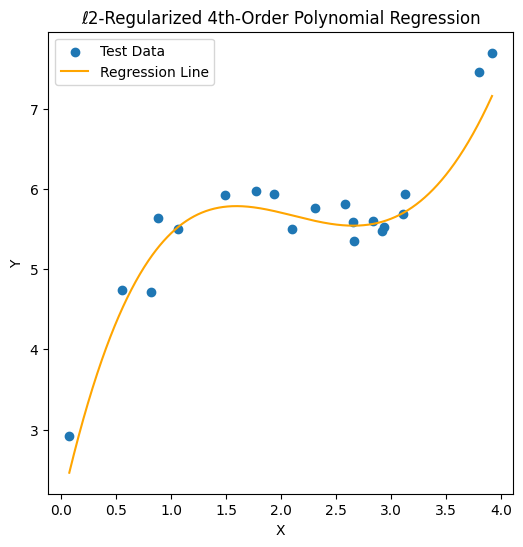

In [342]:
xTrain4Smooth = np.column_stack((np.ones_like(xTrainSmooth), xTrainSmooth, xTrainSmooth**2, xTrainSmooth**3, xTrainSmooth**4))

# calculate weights using the training data for the best lambda
bestLambda = lambdaValueList[np.argmin(avgValidationErrors)]
bestW = calcRegularizedWeights(xTrain4, yTrain, best_lambda)


# Plot the test data along with the regression line
plt.figure(figsize=(6, 6))
plt.scatter(xTest, yTest, label='Test Data')  # Scatter plot of test data
plt.plot(xTestSmooth, xTest4Smooth.dot(bestW), color='orange', label='Regression Line')  # Plot the regression line
plt.xlabel('X')  # Label for x-axis
plt.ylabel('Y')  # Label for y-axis
plt.title('ℓ2-Regularized 4th-Order Polynomial Regression')  # Title of the plot
plt.legend()  # Display legend
plt.show()  # Show plot
